In [40]:
## updating the lammbda

import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
from Update_LM_functions import calculate_constraints, update_lambda, openfile
# load old lambda 
## path would change depending on where I am running this. 

# ------------------------------------------


## set path 
on_mac = False
on_thinkpad = False 
on_hpg = True

if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder_onServer = data_path + 'A5MCMC_IGF_FoxO/'
path = spec_folder_onServer + '0120_test_lnx/'
# ------------------------------------------

file_name_lambda = path + 'Lambdas.csv'
file_name_error = path+ 'Errors.csv'
read_dictionary = np.load(spec_folder_onServer + 'Arrays_for_max_ent/MuLnCons_28Conds_0119.npy',allow_pickle='TRUE').item()
real_cons = read_dictionary['array']


In [41]:
real_cons

array([473.3266724 , 454.10860632, 454.92797602, 436.5247793 ,
       410.89845591, 399.71709395, 396.37161368, 473.3266724 ,
       463.36560404, 448.82085023, 408.61048502, 374.72214861,
       359.57389104, 357.00817722, 473.3266724 , 440.84614128,
       431.31182823, 380.0354967 , 330.08426843, 317.88807432,
       316.34335599, 473.3266724 , 432.45472093, 389.35206541,
       273.95826841, 219.50611675, 216.90903078, 221.13188648,
         6.14919878,   6.10824505,   6.10904954,   6.06641388,
         6.00272755,   5.9728854 ,   5.96429802,   6.14845295,
         6.12703243,   6.09448777,   5.99752984,   5.90432614,
         5.85977955,   5.85218455,   6.14952339,   6.07859007,
         6.05544323,   5.92421553,   5.77407555,   5.73330474,
         5.72727125,   6.14559706,   6.05520892,   5.94798073,
         5.58558721,   5.35800592,   5.34594168,   5.36404087])

In [42]:


if not os.path.exists(file_name_lambda): 

    raise ValueError("No saved Lagrange multipliers, nothing to update. You have to save initial Lagrange multipliers first")
    
Lambda_np = openfile(file_name_lambda)

iterationp1, _ = Lambda_np.shape
iteration = iterationp1 -1

#
moments_filename =path + f'moments_{iteration}.csv'


df = pd.read_csv(moments_filename, sep = ',', header = None) 

Data_np = df.to_numpy()
### take away the nan values 
idxn = np.argwhere(np.isnan(Data_np))
idx_nan_rows = idxn[:,0]

data = np.delete(Data_np,idx_nan_rows, 0)
Preds = calculate_constraints(data)

# preds_power = np.floor(np.log10(Preds))
# alpha_power = np.ones(len(Preds))

Error = Preds - real_cons[:len(Preds)]
Old_Lambda = Lambda_np[-1,:]
# alpha_arr = 10**(-np.log10(Preds) -1 )


In [43]:

Error

array([102.30333364, 116.85718373, 105.36706328,  99.2536584 ,
        94.03638884,  93.37800454,  86.54143598, 102.30333364,
       105.28889104, 104.01857215, 108.78049153, 100.53902101,
       100.70868716,  91.4958171 , 102.30333364, 125.51111895,
       114.20910566, 119.90434511, 118.60070757, 113.87281362,
       103.16223487, 102.30333364, 120.40108558, 114.97129178,
       137.99855606, 115.55686166, 100.90858486,  88.01694067,
         0.17119589,   0.2043788 ,   0.18565553,   0.18601821,
         0.19364425,   0.20086737,   0.18939769,   0.17194172,
         0.18171439,   0.1874371 ,   0.22149332,   0.23327979,
         0.24654617,   0.22845331,   0.17087128,   0.22628594,
         0.21374458,   0.2617729 ,   0.30687133,   0.30927067,
         0.28605937,   0.17479761,   0.22655784,   0.24568459,
         0.41012683,   0.42430249,   0.37927456,   0.33106506])

In [44]:

mumu_data = np.mean(real_cons[:int(len(real_cons)/2)])
mulnx_data = np.mean(real_cons[int(len(real_cons)/2):])
# print(mumu_data)
# print(mus_data)
norm_vec = np.ones(len(real_cons))
norm_vec[:int(len(norm_vec)/2)] = norm_vec[:int(len(norm_vec)/2)]*mumu_data
norm_vec[int(len(norm_vec)/2):] = norm_vec[int(len(norm_vec)/2):]*mulnx_data
# norm_vec2 = np.concatenate((mumu_data*np.ones(int(len(real_cons)/2)), mulnx_data*np.ones(int(len(real_cons)/2))), axis = 0)
# norm_vec2 == norm_vec

In [45]:
Error/norm_vec

array([0.26455044, 0.30218585, 0.27247307, 0.25666416, 0.2431726 ,
       0.24147006, 0.22379109, 0.26455044, 0.27227092, 0.26898595,
       0.28129999, 0.25998803, 0.26042678, 0.23660283, 0.26455044,
       0.32456442, 0.29533807, 0.31006563, 0.3066945 , 0.29446844,
       0.26677151, 0.26455044, 0.31135017, 0.29730904, 0.3568562 ,
       0.29882329, 0.2609437 , 0.22760666, 0.02894592, 0.03455651,
       0.03139077, 0.03145209, 0.0327415 , 0.03396279, 0.03202349,
       0.02907203, 0.0307244 , 0.031692  , 0.03745025, 0.03944311,
       0.0416862 , 0.03862705, 0.02889104, 0.03826058, 0.03614008,
       0.04426074, 0.05188602, 0.0522917 , 0.04836712, 0.0295549 ,
       0.03830656, 0.04154052, 0.06934453, 0.07174136, 0.06412801,
       0.05597671])

In [46]:
# Lambda_lnx ~ 10^-1 
# lambda_mu ~ 10^-2 

In [47]:
alpha =np.concatenate( (np.ones(int(len(real_cons)/2))*10**(-1), np.ones(int(len(real_cons)/2))*10), axis = 0)
Lambda = update_lambda(Error = Error, old_lambda= Old_Lambda, norm_vector= norm_vec, alpha_cons = alpha)#, alpha_power = alpha_power) 
# Lambda= Lambda.tolist()
# Error = Error.tolist()





In [48]:
Lambda

array([0.02645504, 0.03021858, 0.02724731, 0.02566642, 0.02431726,
       0.02414701, 0.02237911, 0.02645504, 0.02722709, 0.02689859,
       0.02813   , 0.0259988 , 0.02604268, 0.02366028, 0.02645504,
       0.03245644, 0.02953381, 0.03100656, 0.03066945, 0.02944684,
       0.02667715, 0.02645504, 0.03113502, 0.0297309 , 0.03568562,
       0.02988233, 0.02609437, 0.02276067, 0.28945921, 0.3455651 ,
       0.31390767, 0.31452088, 0.32741505, 0.33962795, 0.32023493,
       0.29072027, 0.30724397, 0.31691995, 0.37450245, 0.39443109,
       0.41686198, 0.38627045, 0.28891036, 0.38260584, 0.36140083,
       0.44260745, 0.51886019, 0.52291702, 0.48367118, 0.29554902,
       0.38306557, 0.41540522, 0.69344531, 0.71741361, 0.64128008,
       0.55976712])

saved figure


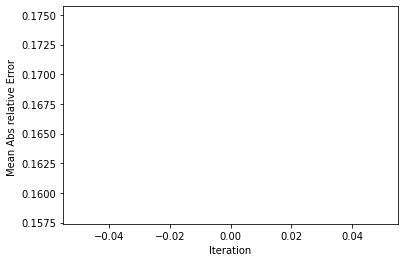

In [49]:


# ------------------------------------------
#write the result 


if os.path.exists(file_name_error): 
    with open(file_name_error, 'a') as add_file_error:
        csv_adder_error = csv.writer(add_file_error, delimiter = ',')
        csv_adder_error.writerow(Error)
        add_file_error.flush()
else:
    with open(file_name_error, 'w') as new_file_error:

        csv_writer_error = csv.writer(new_file_error, delimiter = ',')
#         csv_writer_pars.writerow(Par_fieldnames)
        csv_writer_error.writerow(Error)
        new_file_error.flush()
    
#################################################### Storing the Lambda  

if os.path.exists(file_name_lambda): 
    with open(file_name_lambda, 'a') as add_file_lambda:
        csv_adder_lambda = csv.writer(add_file_lambda, delimiter = ',')
        csv_adder_lambda.writerow(Lambda)
        add_file_lambda.flush()
else:
    print('trouble loading file')


############################################# Plotting
import matplotlib.pyplot as plt
if os.path.isdir(path+'figs')==False:
    os.mkdir(path+'figs') 
# plot the absolute relative error
df_err = pd.read_csv(file_name_error, sep = ',', header = None) 
err_np = df_err.to_numpy()
rc_m= np.tile(real_cons[:len(err_np[0,:])] , [err_np.shape[0],1])
#print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
plt.plot(range(len(mean_rel_abs) ), mean_rel_abs)
plt.ylabel('Mean Abs relative Error ')
plt.xlabel('Iteration')
# plt.title('Iteration[1:]')
plt.savefig(path+'figs/error.png')
print('saved figure')
# save error array 
np.save(path+'mean_abs_error.npy', mean_rel_abs)
# plot the lagrange multipliers 

# plot the parameters 

# store the absolute relative error array 


